In [78]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from test_model import NeuralNetwork

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
#train set
training_data = datasets.EMNIST(
    root=  "data",
    split = "letters",
    train=True,
    download=True,
    transform=ToTensor()
)

In [55]:
#test set
test_data = datasets.EMNIST(
    root="data",
    split = "letters",
    train=False,
    download=True,
    transform=ToTensor()
)

In [56]:
labels_map = {
    1: "A",  2: "B",  3: "C",  4: "D",  5: "E",
    6: "F",  7: "G",  8: "H",  9: "I", 10: "J",
   11: "K", 12: "L", 13: "M", 14: "N", 15: "O",
   16: "P", 17: "Q", 18: "R", 19: "S", 20: "T",
   21: "U", 22: "V", 23: "W", 24: "X", 25: "Y", 26: "Z"
}
    


In [57]:
from torch.utils.data import random_split, DataLoader

total_size = len(training_data)
val_size = int(0.2 * total_size)  
train_size = total_size - val_size

train_dataset, val_dataset = random_split(training_data, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)


Feature batch shape: torch.Size([64, 1, 28, 28]) 
Labels batch shape: torch.Size([64])


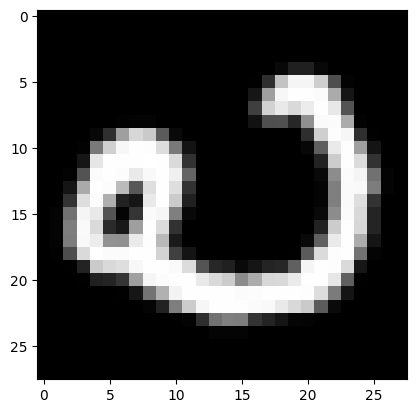

Label: 7
Trening skup iz DataLoader-a: 99840
Validacioni skup iz DataLoader-a: 24960
Test skup iz DataLoader-a: 20800


In [101]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()} ") #batch, d, d slike, d slike
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

print(f"Trening skup iz DataLoader-a: {len(train_dataloader.dataset)}")
print(f"Validacioni skup iz DataLoader-a: {len(val_dataloader.dataset)}")
print(f"Test skup iz DataLoader-a: {len(test_dataloader.dataset)}")


MODEL:

In [59]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

In [60]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
'''class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() #osiguravanje izvrsavanja roditeljske klase
        self.flatten = nn.Flatten() #ako je slika 28x28 da bude 784
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, 26),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits'''

In [62]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=26, bias=True)
  )
)


In [63]:
#ovo ne moras za tvoj dataset
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [64]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=26, bias=True)
  )
)


Layer: linear_stack.0.weight | Size: torch.Size([500, 784]) | Values : tensor([[ 0.0022, -0.0021,  0.0279,  ..., -0.0311,  0.0008,  0.0264],
        [ 0.0260, -0.0223,  0.0191,  ..., -0.0119, -0.0087, -0.0260]],
       grad_fn=<SliceBackward0>) 

Layer: linear_stack.0.bias | Size: torch.Size([500]) | Values : tensor([-0.0256,  0.0178], grad_fn=<SliceBackward0>) 

Layer: linear_stack.2.weight | Size: torch.Size([500, 500]) | Values : tensor([[-3.5274e-02,  3.0932e-02, -8.1488e-03,  2.3572e-02, -2.6019e-02,
         -7.1456e-03, -3.6572e-02,  7.9146e-03, -9.7344e-03, -6.9767e-04,
          2.2634e-02, -3.9409e-02, -1.4507e-02,  1.8395e-03, -1.8083e-02,
        


Layer: linear_stack.2.bias | Size: torch.Size([500]) | Values : tensor([0.0230, 0.0011], grad_fn=<SliceBackward0>) 

Layer: linear_stack.4.weight | Size: torch.Size([26, 500]) | Values : tensor([[-1.5497e-02,  2.1487e-03,  3.3175e-02, -1.0219e-02, -4.3947e-02,
          3.3779e-02,  2.8199e-02,  1.3021e-02, -7.1739e-03,  2.3832e-02,
         -1.2151e-03, -2.0113e-02, -2.1243e-02,  1.2092e-02, -2.6265e-02,
         -3.1681e-02, -1.0846e-02,  7.9781e-03, -2.5013e-02, -3.3292e-03,
          2.6247e-02, -2.8222e-02,  4.9817e-03,  4.1034e-03, -2.0387e-02,
          5.8374e-03, -3.7941e-02,  9.9126e-03, -3.1626e-02, -1.8561e-02,
          3.9132e-02,  3.0678e-02, -4.3236e-02,  2.1899e-02, -3.9138e-02,
          2.0548e-02,  3.0088e-02, -1.6827e-02,  1.3863e-03, -3.9107e-02,
          2.6773e-02, -2.2001e-02,  1.3096e-02, -1.3087e-02, -3.4793e-02,
         -3.7372e-02,  3.6657e-02, -4.4445e-02, -2.4765e-02, -1.4860e-02,
          1.2141e-02, -3.1197e-02,  2.3822e-02,  2.3646e-02, -2.9493e-02

In [65]:
#loss funkcija, optimizator
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [66]:
import matplotlib.pyplot as plt
import datetime

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_dir = f'models/{timestamp}'
os.makedirs(save_dir, exist_ok=True)

loss_values = []
accuracy_values = []

max_epochs = 200
min_improvement = 0.5  # 2% poboljšanja
patience = 7

for epoch in range(max_epochs):  
    running_loss = 0.0
    running_loss = 0.0
    batch_count = 0
    train_correct = 0
    train_total = 0

    model.train()
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        labels = labels - 1
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        batch_count += 1

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_loss / batch_count
    train_accuracy = 100 * train_correct / train_total

    print(f'[Epoch {epoch + 1}] Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')


    model.eval()
    val_loss_total = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            labels = labels - 1
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss_total += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            
    val_loss = val_loss_total / len(val_dataloader)
    val_accuracy = 100 * val_correct / val_total
    loss_values.append(train_loss)
    accuracy_values.append(val_accuracy)

    print(f'[Epoch {epoch + 1}] Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%\n')

    
    filename = os.path.join(save_dir, f'epoch_{epoch + 1}.pth')
    torch.save(model.state_dict(), filename)
    print(f"Model sačuvan: {filename}")

    if len(accuracy_values) >= patience + 1:
        last_five = accuracy_values[-patience:]  # poslednjih 5
        prev = accuracy_values[-patience - 1]    # ona šesta unazad
        avg_last_five = sum(last_five) / patience
        improvement = avg_last_five - prev

        if improvement < min_improvement:
            print(f"Early stopping: prosečna tačnost poslednjih {patience} epoha = {avg_last_five:.2f}%, a epohe pre toga = {prev:.2f}%.")
            print(f"Poboljšanje je {improvement:.2f}%, što je manje od {min_improvement}%.\n")
            break

print('Finished Training')


[Epoch 1] Train Loss: 3.2237, Train Accuracy: 13.80%
[Epoch 1] Val Loss: 3.1767, Val Accuracy: 25.24%

Model sačuvan: models/2025-06-26_17-49-45\epoch_1.pth
[Epoch 2] Train Loss: 3.0813, Train Accuracy: 28.55%
[Epoch 2] Val Loss: 2.9452, Val Accuracy: 32.82%

Model sačuvan: models/2025-06-26_17-49-45\epoch_2.pth
[Epoch 3] Train Loss: 2.7070, Train Accuracy: 36.96%
[Epoch 3] Val Loss: 2.4336, Val Accuracy: 41.47%

Model sačuvan: models/2025-06-26_17-49-45\epoch_3.pth
[Epoch 4] Train Loss: 2.1648, Train Accuracy: 46.70%
[Epoch 4] Val Loss: 1.9275, Val Accuracy: 50.58%

Model sačuvan: models/2025-06-26_17-49-45\epoch_4.pth
[Epoch 5] Train Loss: 1.7653, Train Accuracy: 53.21%
[Epoch 5] Val Loss: 1.6367, Val Accuracy: 55.04%

Model sačuvan: models/2025-06-26_17-49-45\epoch_5.pth
[Epoch 6] Train Loss: 1.5495, Train Accuracy: 56.87%
[Epoch 6] Val Loss: 1.4798, Val Accuracy: 57.90%

Model sačuvan: models/2025-06-26_17-49-45\epoch_6.pth
[Epoch 7] Train Loss: 1.4257, Train Accuracy: 59.24%
[Epoc

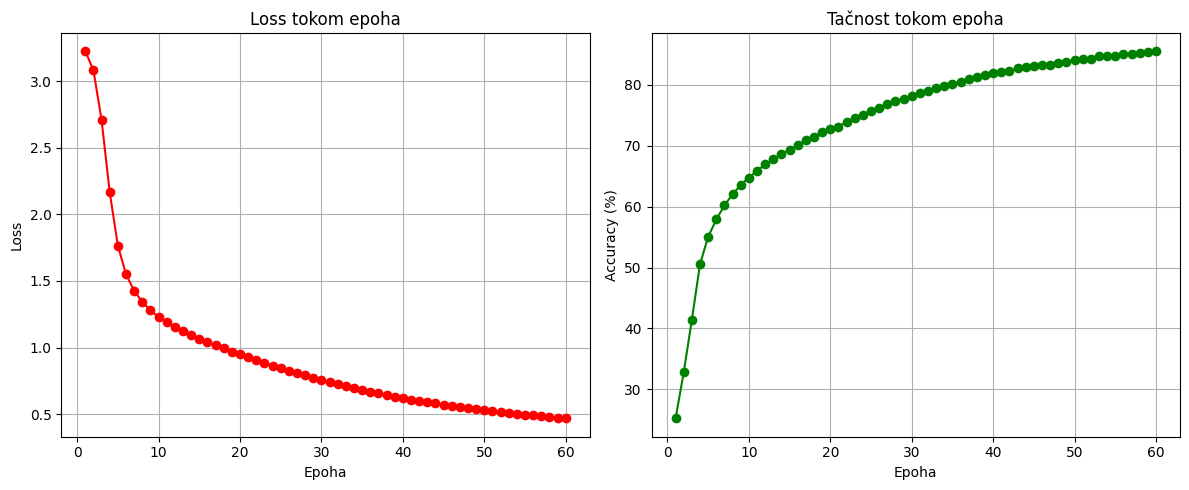

In [67]:
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, marker='o', color='red')
plt.title('Loss tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, marker='o', color='green')
plt.title('Tačnost tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [83]:
batch_size = 64
model_path = r'C:\vi\pfe\air_writting\models\2025-06-26_17-49-45\epoch_60.pth'

test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

criterion = nn.CrossEntropyLoss()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), (labels - 1).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

average_loss = test_loss / len(test_dataloader)
accuracy = 100 * correct / total
print(f'\nRezultati testa:')
print(f'Test Loss: {average_loss:.4f}')
print(f'Test Accuracy: {accuracy:.2f}%')


Rezultati testa:
Test Loss: 0.4994
Test Accuracy: 85.45%


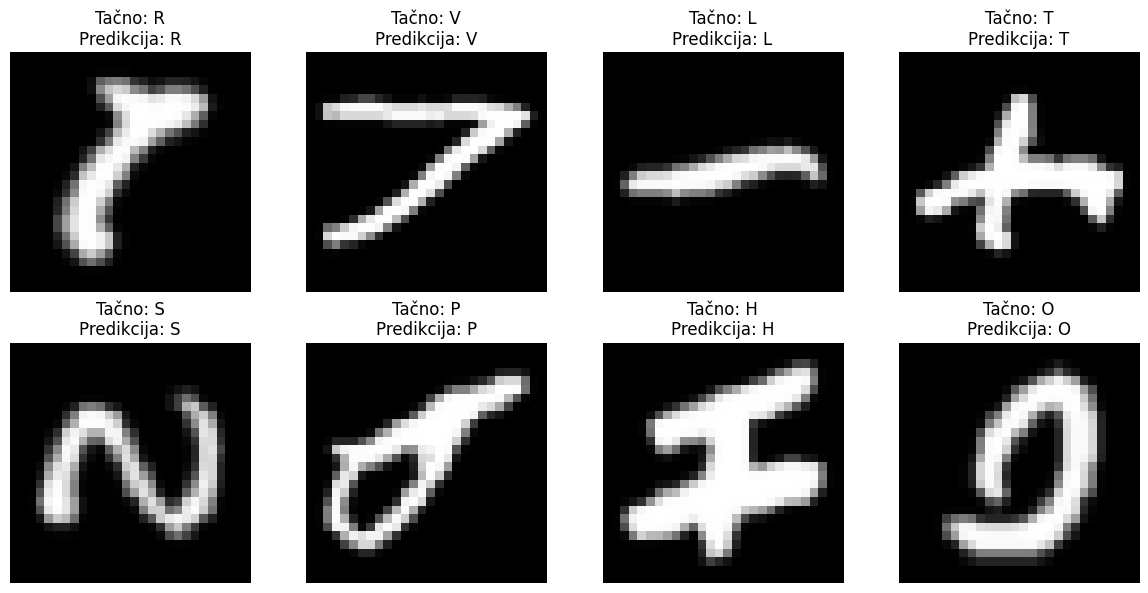

In [102]:
# === Učitavanje modela ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('models/2025-06-26_17-49-45/epoch_24.pth', map_location=device))
model.eval()

# === Mapiranje labela na slova (EMNIST Labels: 1-26 → A-Z) ===
labels_map = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E",
    5: "F", 6: "G", 7: "H", 8: "I", 9: "J",
    10: "K", 11: "L", 12: "M", 13: "N", 14: "O",
    15: "P", 16: "Q", 17: "R", 18: "S", 19: "T",
    20: "U", 21: "V", 22: "W", 23: "X", 24: "Y", 25: "Z"
}

# === DataLoader za test skup ===
test_loader = DataLoader(test_data, batch_size=16, shuffle=True)

# === Prikaz nekoliko primera ===
data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images.to(device), (labels - 1).to(device)  # prilagođavanje

outputs = model(images)
_, preds = torch.max(outputs, 1)

# === Prikaz 8 primera ===
plt.figure(figsize=(12, 6))
for i in range(8):
    img = images[i].cpu().squeeze()
    true_label = labels_map[labels[i].item()]
    predicted_label = labels_map[preds[i].item()]
    
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f'Tačno: {true_label}\nPredikcija: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


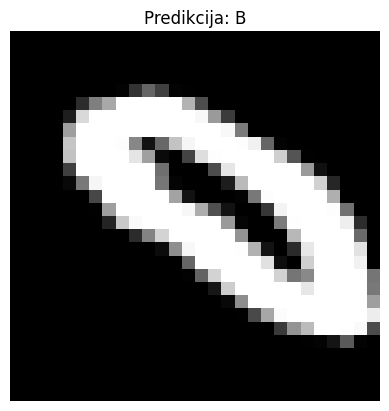

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# === DEFINICIJA MODELA (isti kao kad si trenirala) ===
import torch.nn as nn


# === PUTANJA DO TVOJE SLIKE ===
image_path = r"C:\vi\pfe\air_writting\viber_slika_2025-06-24_10-32-25-353.png"

# === UČITAVANJE I PRETPROCESIRANJE SLIKE ===
img = Image.open(image_path).convert("L")  # grayscale

transform = transforms.Compose([
    transforms.Resize((28, 28)),       # resize na 28x28
    transforms.ToTensor(),             # pretvori u tensor
])

input_tensor = transform(img).unsqueeze(0)  # dodaj batch dimenziju

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# === UČITAVANJE TRENIRANOG MODELA ===
model = NeuralNetwork().to(device)
model_path = r"models\2025-06-26_17-49-45\epoch_24.pth"  # izmeni ako želiš drugi model
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

labels_map = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E",
    5: "F", 6: "G", 7: "H", 8: "I", 9: "J",
    10: "K", 11: "L", 12: "M", 13: "N", 14: "O",
    15: "P", 16: "Q", 17: "R", 18: "S", 19: "T",
    20: "U", 21: "V", 22: "W", 23: "X", 24: "Y", 25: "Z"
}

predicted_idx = predicted.item()
predicted_letter = labels_map.get(predicted_idx, "Nepoznata klasa")

plt.imshow(img, cmap="gray")
plt.title(f"Predikcija: {predicted_letter}")
plt.axis("off")
plt.show()
